# 커피지수 - Part 3
### 3. Cartogram 그리기

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
cf = pd.read_csv('data/커피지수.csv')
cf.head()

,ID,스타벅스,커피빈,이디야,빽다방,커피지수
0,가평,2,0,9,0,0.222222
1,강릉,4,0,17,2,0.210526
2,거제,6,0,9,0,0.666667
3,경산,8,0,8,4,0.666667
4,경주,7,2,25,1,0.346154


In [3]:
map_raw = pd.read_excel('data/draw_korea_raw(2021).xlsx')
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace=True)
print(map.shape)
map.head()

(250, 3)


,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [4]:
map.columns = ['y','x','ID']
map.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [6]:
df = pd.merge(map, cf , how='left')
print(df.shape)
df.head()

(250, 8)


,y,x,ID,스타벅스,커피빈,이디야,빽다방,커피지수
0,0,7,철원,NaN,NaN,NaN,NaN,NaN
1,0,8,화천,NaN,NaN,NaN,NaN,NaN
2,0,9,양구,NaN,NaN,NaN,NaN,NaN
3,0,10,고성(강원),1.0,0.0,0.0,0.0,inf
4,1,3,양주,7.0,0.0,16.0,2.0,0.388889


In [17]:
df.fillna(0, inplace=False)
df.head()

,y,x,ID,스타벅스,커피빈,이디야,빽다방,커피지수
0,0,7,철원,0,0,0,0,0.000000
1,0,8,화천,0,0,0,0,0.000000
2,0,9,양구,0,0,0,0,0.000000
3,0,10,고성(강원),1,0,0,0,inf
4,1,3,양주,7,0,16,2,0.388889


In [15]:
df.fillna(0, inplace=True)
df.스타벅스 = df.스타벅스.astype(int)
df.커피빈 = df.커피빈.astype(int)
df.이디야 = df.이디야.astype(int)
df.빽다방 = df.빽다방.astype(int)

df.head()

,y,x,ID,스타벅스,커피빈,이디야,빽다방,커피지수
0,0,7,철원,0,0,0,0,0.000000
1,0,8,화천,0,0,0,0,0.000000
2,0,9,양구,0,0,0,0,0.000000
3,0,10,고성(강원),1,0,0,0,inf
4,1,3,양주,7,0,16,2,0.388889


- 커피지수

In [9]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

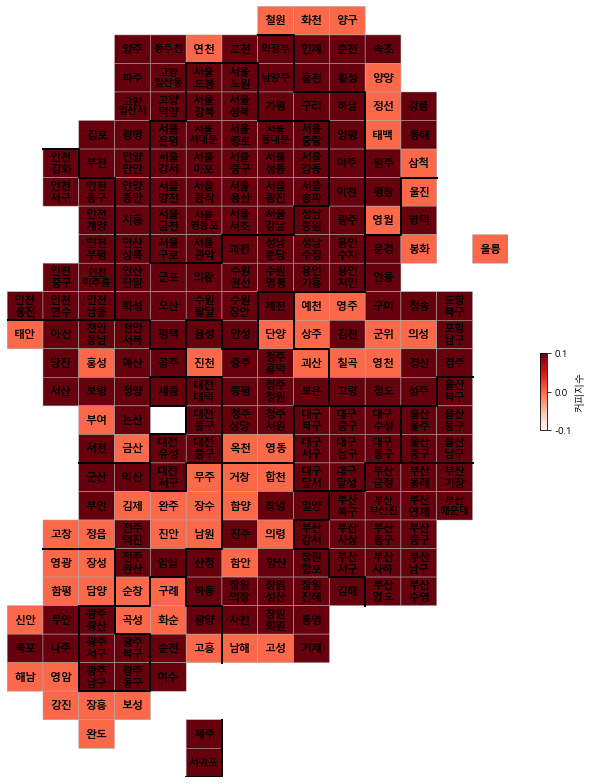

In [13]:
drawKorea('커피지수', df, 'Reds')

In [14]:
# 커피지수 Top 10 지역
df.sort_values(by ='커피지수', ascending=False).head(10)

,y,x,ID,스타벅스,커피빈,이디야,빽다방,커피지수
145,14,4,계룡,1,0,0,0,inf
3,0,10,고성(강원),1,0,0,0,inf
243,24,0,진도,1,0,0,0,inf
92,9,11,영양,1,0,0,0,inf
196,18,10,부산 동구,4,1,1,0,5.000000
186,17,12,부산 해운대,33,4,7,2,4.111111
66,7,7,서울 강남,76,40,23,9,3.625000
65,7,6,서울 서초,38,23,14,4,3.388889
33,4,6,서울 종로,27,13,11,3,2.857143
44,5,6,서울 중구,42,7,13,5,2.722222
